In [77]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [96]:
# data = pd.read_csv('features_video_landmarks_20220628_140331.csv', index_col = 0)
# data = pd.read_csv('test_out2.csv', index_col = 0)
data = pd.read_csv('set2_features_video_landmarks_20220628_140331.csv', index_col = 0)

data.head()

,ID,RIGHT_WRIST_THUMB_CMC_MCP,RIGHT_THUMB_CMC_MCP_IP,RIGHT_THUMB_MCP_IP_TIP,RIGHT_WRIST_INDEX_FINGER_MCP_PIP,RIGHT_INDEX_FINGER_MCP_PIP_DIP,RIGHT_INDEX_FINGER_PIP_DIP_TIP,RIGHT_WRIST_MIDDLE_FINGER_MCP_PIP,RIGHT_MIDDLE_FINGER_MCP_PIP_DIP,RIGHT_MIDDLE_FINGER_PIP_DIP_TIP,...,RIGHT_THUMB_CMC_TIP,RIGHT_INDEX_MCP_TIP,RIGHT_MIDDLE_MCP_TIP,RIGHT_RING_MCP_TIP,RIGHT_PINKY_MCP_TIP,RIGHT_THUMB_TIP_INDEX_TIP,RIGHT_INDEX_TIP_MIDDLE_TIP,RIGHT_MIDDLE_TIP_RING_TIP,RIGHT_RING_TIP_PINKY_TIP,WORD_CLASS
0,008_010_003,156.47,173.04,159.29,164.07,175.25,179.48,170.86,176.79,179.48,...,0.083330,0.086844,0.097826,0.091649,0.073775,0.097789,0.020224,0.017980,0.032393,8
1,008_010_003,156.32,174.34,154.93,163.84,175.88,178.60,170.48,176.59,179.41,...,0.085782,0.088386,0.096657,0.091018,0.073908,0.100653,0.018267,0.017139,0.032095,8
2,008_010_003,158.45,174.66,157.67,164.30,175.52,178.41,170.58,176.28,179.31,...,0.086876,0.087243,0.096519,0.089335,0.072003,0.099733,0.018859,0.017979,0.031717,8
3,008_010_003,159.30,174.36,157.45,163.99,175.74,178.78,170.42,176.64,179.68,...,0.085653,0.087580,0.096357,0.089479,0.071982,0.100771,0.018502,0.017843,0.032084,8
4,008_010_003,158.42,174.05,156.04,164.05,175.56,178.68,170.35,176.34,179.57,...,0.085948,0.087684,0.095810,0.089064,0.071732,0.101509,0.018484,0.017655,0.031607,8


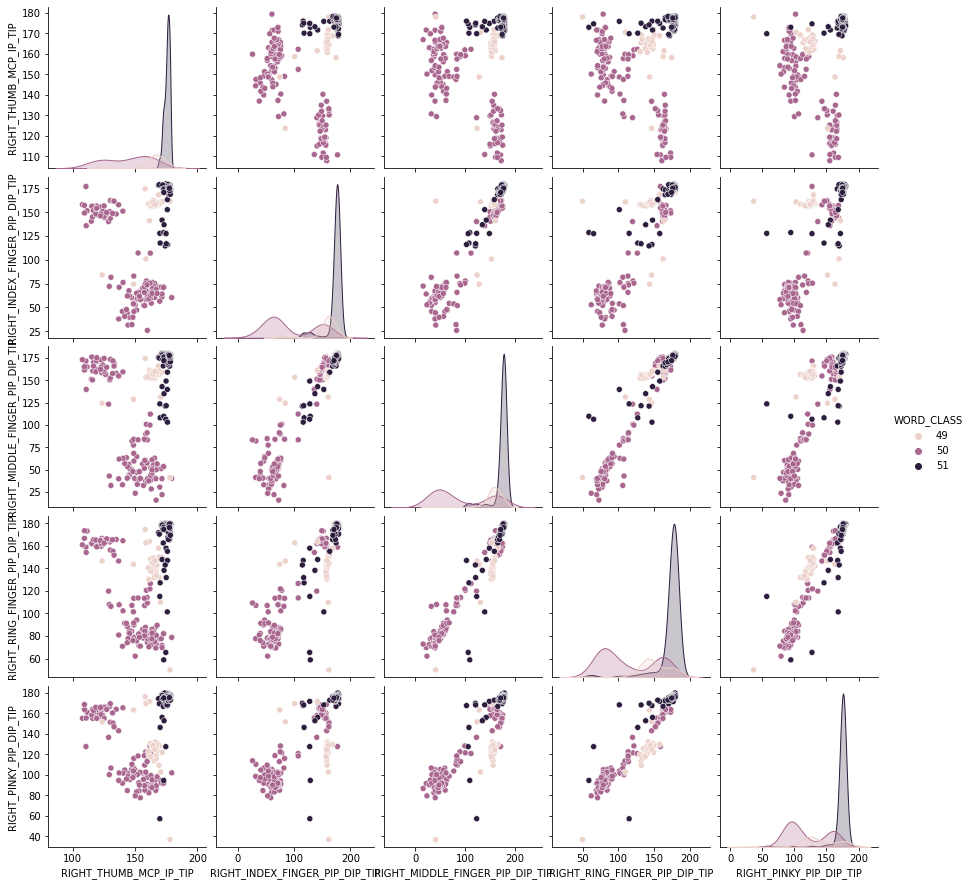

In [13]:
g=sns.pairplot(data[['RIGHT_THUMB_MCP_IP_TIP','RIGHT_INDEX_FINGER_PIP_DIP_TIP','RIGHT_MIDDLE_FINGER_PIP_DIP_TIP','RIGHT_RING_FINGER_PIP_DIP_TIP','RIGHT_PINKY_PIP_DIP_TIP','WORD_CLASS']], hue="WORD_CLASS", height= 2.5)


In [79]:
cols = data.columns
len(cols)
features = cols[1:25]
labels = cols[25]
print(features)
print(labels)

Index(['RIGHT_WRIST_THUMB_CMC_MCP', 'RIGHT_THUMB_CMC_MCP_IP',
       'RIGHT_THUMB_MCP_IP_TIP', 'RIGHT_WRIST_INDEX_FINGER_MCP_PIP',
       'RIGHT_INDEX_FINGER_MCP_PIP_DIP', 'RIGHT_INDEX_FINGER_PIP_DIP_TIP',
       'RIGHT_WRIST_MIDDLE_FINGER_MCP_PIP', 'RIGHT_MIDDLE_FINGER_MCP_PIP_DIP',
       'RIGHT_MIDDLE_FINGER_PIP_DIP_TIP', 'RIGHT_WRIST_RING_FINGER_MCP_PIP',
       'RIGHT_RING_FINGER_MCP_PIP_DIP', 'RIGHT_RING_FINGER_PIP_DIP_TIP',
       'RIGHT_WRIST_PINKY_MCP_PIP', 'RIGHT_PINKY_MCP_PIP_DIP',
       'RIGHT_PINKY_PIP_DIP_TIP', 'RIGHT_THUMB_CMC_TIP', 'RIGHT_INDEX_MCP_TIP',
       'RIGHT_MIDDLE_MCP_TIP', 'RIGHT_RING_MCP_TIP', 'RIGHT_PINKY_MCP_TIP',
       'RIGHT_THUMB_TIP_INDEX_TIP', 'RIGHT_INDEX_TIP_MIDDLE_TIP',
       'RIGHT_MIDDLE_TIP_RING_TIP', 'RIGHT_RING_TIP_PINKY_TIP'],
      dtype='object')
WORD_CLASS


In [80]:
data_norm = pd.DataFrame(data)

for feature in features:
    data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

#Show that should now have zero mean
print("Averages")
print(data.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(data.std(),2))


Averages
ID                                            inf
RIGHT_WRIST_THUMB_CMC_MCP            7.543832e-15
RIGHT_THUMB_CMC_MCP_IP               5.637714e-14
RIGHT_THUMB_MCP_IP_TIP              -1.585679e-14
RIGHT_WRIST_INDEX_FINGER_MCP_PIP    -3.549718e-14
RIGHT_INDEX_FINGER_MCP_PIP_DIP      -2.224956e-14
RIGHT_INDEX_FINGER_PIP_DIP_TIP      -7.175216e-14
RIGHT_WRIST_MIDDLE_FINGER_MCP_PIP    9.501470e-15
RIGHT_MIDDLE_FINGER_MCP_PIP_DIP      1.361045e-14
RIGHT_MIDDLE_FINGER_PIP_DIP_TIP      1.328178e-13
RIGHT_WRIST_RING_FINGER_MCP_PIP     -2.465047e-14
RIGHT_RING_FINGER_MCP_PIP_DIP       -1.091851e-15
RIGHT_RING_FINGER_PIP_DIP_TIP        7.572317e-14
RIGHT_WRIST_PINKY_MCP_PIP           -3.056128e-14
RIGHT_PINKY_MCP_PIP_DIP             -6.870140e-15
RIGHT_PINKY_PIP_DIP_TIP              1.345138e-13
RIGHT_THUMB_CMC_TIP                  2.316899e-15
RIGHT_INDEX_MCP_TIP                 -9.815249e-15
RIGHT_MIDDLE_MCP_TIP                -2.651931e-15
RIGHT_RING_MCP_TIP                   2.41

/var/folders/yr/dx0mkq893512htnm00g0sjgh0000gn/T/ipykernel_63346/201890564.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(pow(data.std(),2))


In [81]:
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data_norm.reindex(indices)[features]
y = data_norm.reindex(indices)[labels]

In [82]:
y = get_dummies(y)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.2)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
X_val = np.array(X_val).astype(np.float32)

y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)
y_val  = np.array(y_val).astype(np.float32)

In [85]:
#Check to make sure split still has 4 features and 3 labels
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(11877, 24) (11877, 4)
(6364, 24) (6364, 4)
(2970, 24) (2970, 4)


In [90]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(24, activation='relu'),
        keras.layers.Dense(20, activation='relu',),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation='softmax')
    ])
    
    return model

In [91]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                750       
                                                                 
 dense_25 (Dense)            (None, 20)                620       
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_27 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1,624
Trainable params: 1,624
Non-trainable params: 0
_________________________________________________________________


In [93]:

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

Train on 11877 samples, validate on 2970 samples
Epoch 1/30
11877/11877 [==============================] - 0s 33us/sample - loss: 0.3990 - acc: 0.8501 - val_loss: 0.0409 - val_acc: 0.9949
Epoch 2/30
 2336/11877 [====>.........................] - ETA: 0s - loss: 0.0923 - acc: 0.9670

/Users/prasadmaduranga/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


11877/11877 [==============================] - 0s 32us/sample - loss: 0.0678 - acc: 0.9802 - val_loss: 0.0134 - val_acc: 0.9980
Epoch 3/30
11877/11877 [==============================] - 0s 27us/sample - loss: 0.0360 - acc: 0.9907 - val_loss: 0.0089 - val_acc: 0.9987
Epoch 4/30
11877/11877 [==============================] - 0s 23us/sample - loss: 0.0258 - acc: 0.9931 - val_loss: 0.0089 - val_acc: 0.9993
Epoch 5/30
11877/11877 [==============================] - 0s 27us/sample - loss: 0.0212 - acc: 0.9937 - val_loss: 0.0085 - val_acc: 0.9990
Epoch 6/30
11877/11877 [==============================] - 0s 26us/sample - loss: 0.0169 - acc: 0.9948 - val_loss: 0.0083 - val_acc: 0.9990
Epoch 7/30
11877/11877 [==============================] - 0s 26us/sample - loss: 0.0151 - acc: 0.9952 - val_loss: 0.0089 - val_acc: 0.9990
Epoch 8/30
11877/11877 [==============================] - 0s 27us/sample - loss: 0.0136 - acc: 0.9959 - val_loss: 0.0094 - val_acc: 0.9990
Epoch 9/30
11877/11877 [==============

In [94]:
model.evaluate(X_test, y_test)

[0.0023468693104954546, 0.9996857]

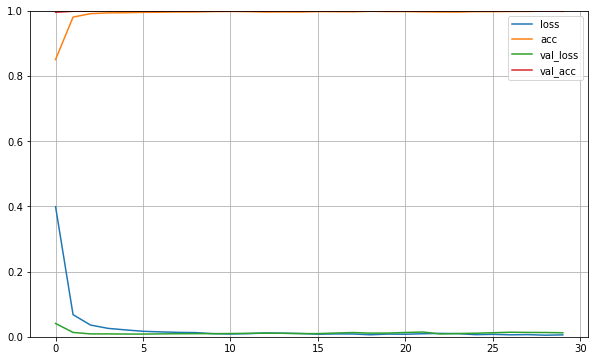

In [95]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)